# Supervised Learning — Classification Using Support Vector Machines

## What Is a Support Vector Machine?

In the previous notebook (Logistic regression), we saw how to perform classification using <b>logistics regression.</b> In this notebook, you will learn <b>another supervised machine learning algorithm</b> that is also very popular among data scientists — <b>Support Vector Machines (SVM).</b> <br>
Like logistics regression, <b>SVM is also a classification algorithm.<b>

The main idea behind SVM is to <b>draw a line between two or more classes in
the best possible manner</> (see Figure below).

## Using Scikit-learn for SVM

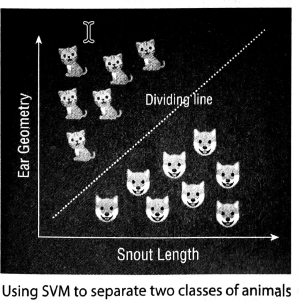

In [8]:
from IPython.display import Image
Image(filename='fig81.png')

Once the line is drawn to separate the classes, you can then use it to predict
future data. For example, given the <b>snout length and ear geometry</b> of a new unknown animal, you can now use the dividing line as a classifier to predict if the animal <b>is a dog or a cat.</b>
In this chapter, you will learn how <b>SVM</b> works and the various techniques
you can use to <b>adapt SVM for solving nonlinearly-separable datasets.</b>

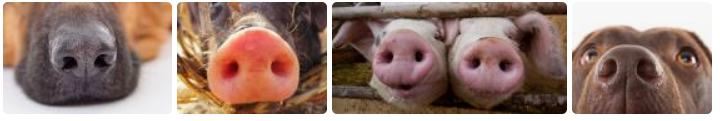

In [9]:
from IPython.display import Image
Image(filename='snout.png')

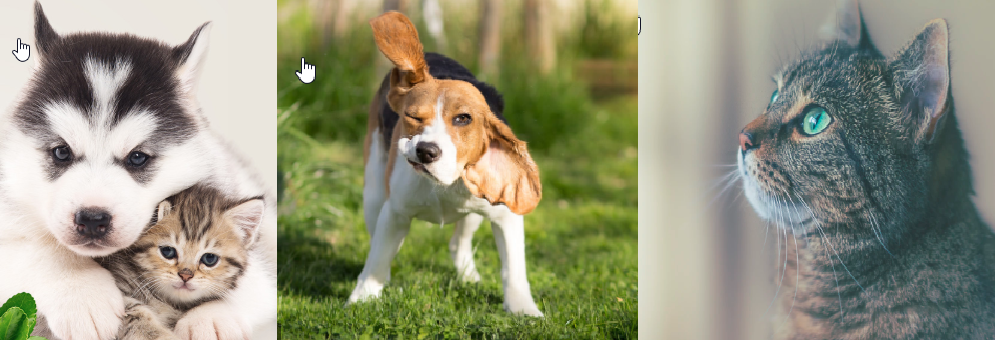

In [10]:
from IPython.display import Image
Image(filename='catdogears.png')

## Maximum Separability

How does SVM separate two or more classes? Consider the set of points in
Figure below. Before you look at the next figure, Visually think of a <b>straight line dividing the points into two groups.</b>

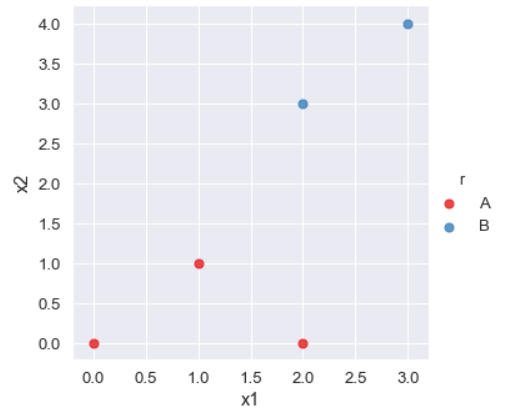

In [15]:
from IPython.display import Image
Image(filename='fig82.png')

Now look at Figure bellow, which shows two possible lines separating the two
groups of points. Is this what you had in mind?<br>
Though both lines separate the points into two distinct groups, <br>which one
is the right one?<br> 



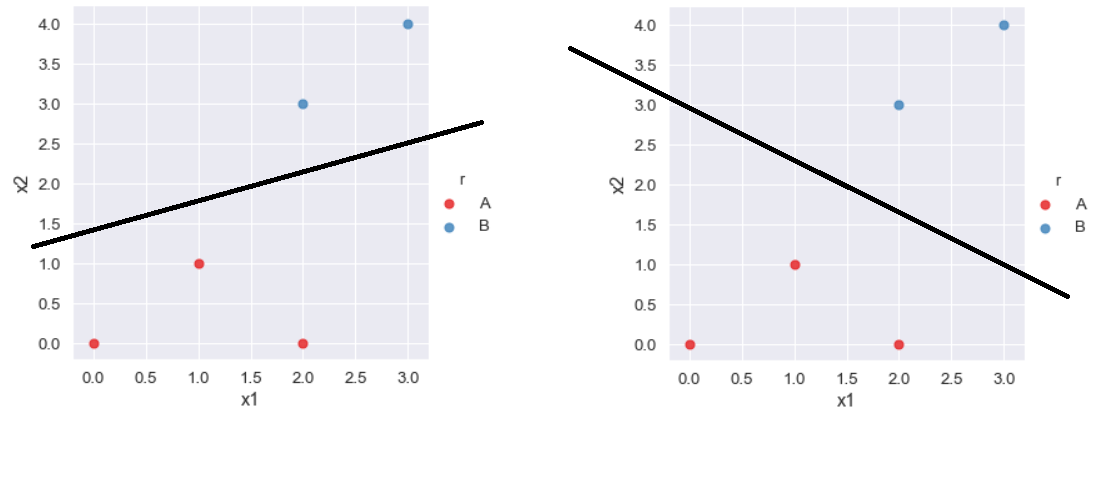

In [16]:
from IPython.display import Image
Image(filename='fig83.png')

<b>For SVM, the right line is the one that has the widest margins</b> (with each margin touching at least a point in each class), as shown in Figure bellow.<br>

In that figure, <b>d1 and d2 are the width of the margins.</b><br>
The goal is to find the largest possible width for the margin that can separate the two groups. <br>
<br> Hence, in this case <b>d2 is the largest.</b>
<br>Thus the line chosen is the one on the right.

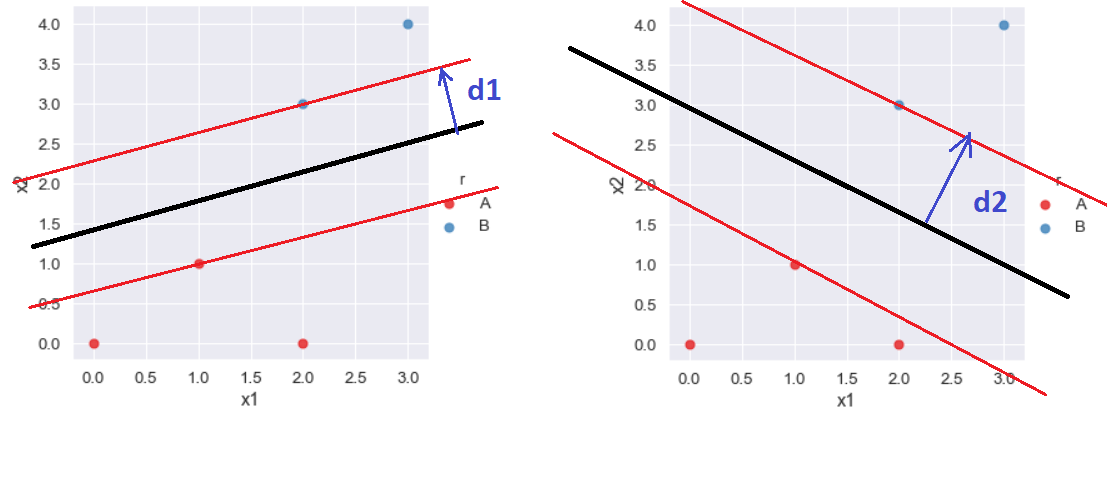

In [17]:
from IPython.display import Image
Image(filename='fig84.png')

Each of the two margins touches the closest point(s) to each group of points,
and the center of the two margins is known as the <b>hyperplane.</b><br>
The hyperplane is the line separating the two groups of points. We use the term <b>"hyperplane"</b> instead of “line” because in <b>SVM we typically deal with more than two dimensions</b>, and using the word <b>"hyperplane"</b> more accurately conveys the idea of a plane in a <b>multidimensional space.</b>

## Support Vectors

A key term in SVM is <b>support vectors.</b><br>
<b>Support vectors</b> are the <b>points that lie on the two margins.</b><br>
Using the example from the previous section,
Figure below shows the two support vectors lying on the two margins.


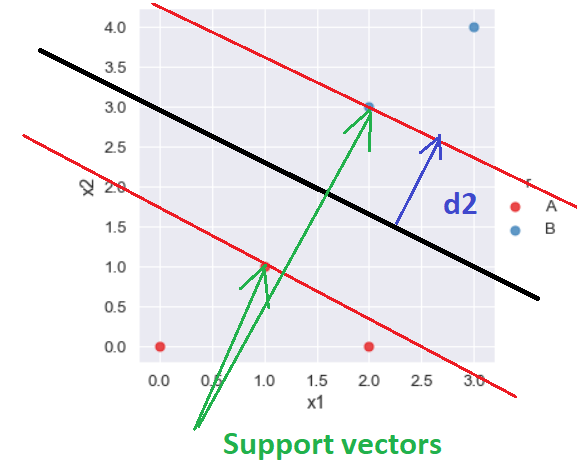

In [20]:
from IPython.display import Image
Image(filename='fig85.png')

## Formula for the hyperplane

With the series of points, the next question would be to find the fromula for the hyperplane, together with the two margins. Without delving too much into the math behind this, the figure below shows the <b>formula for getting the hyperplane.</b>

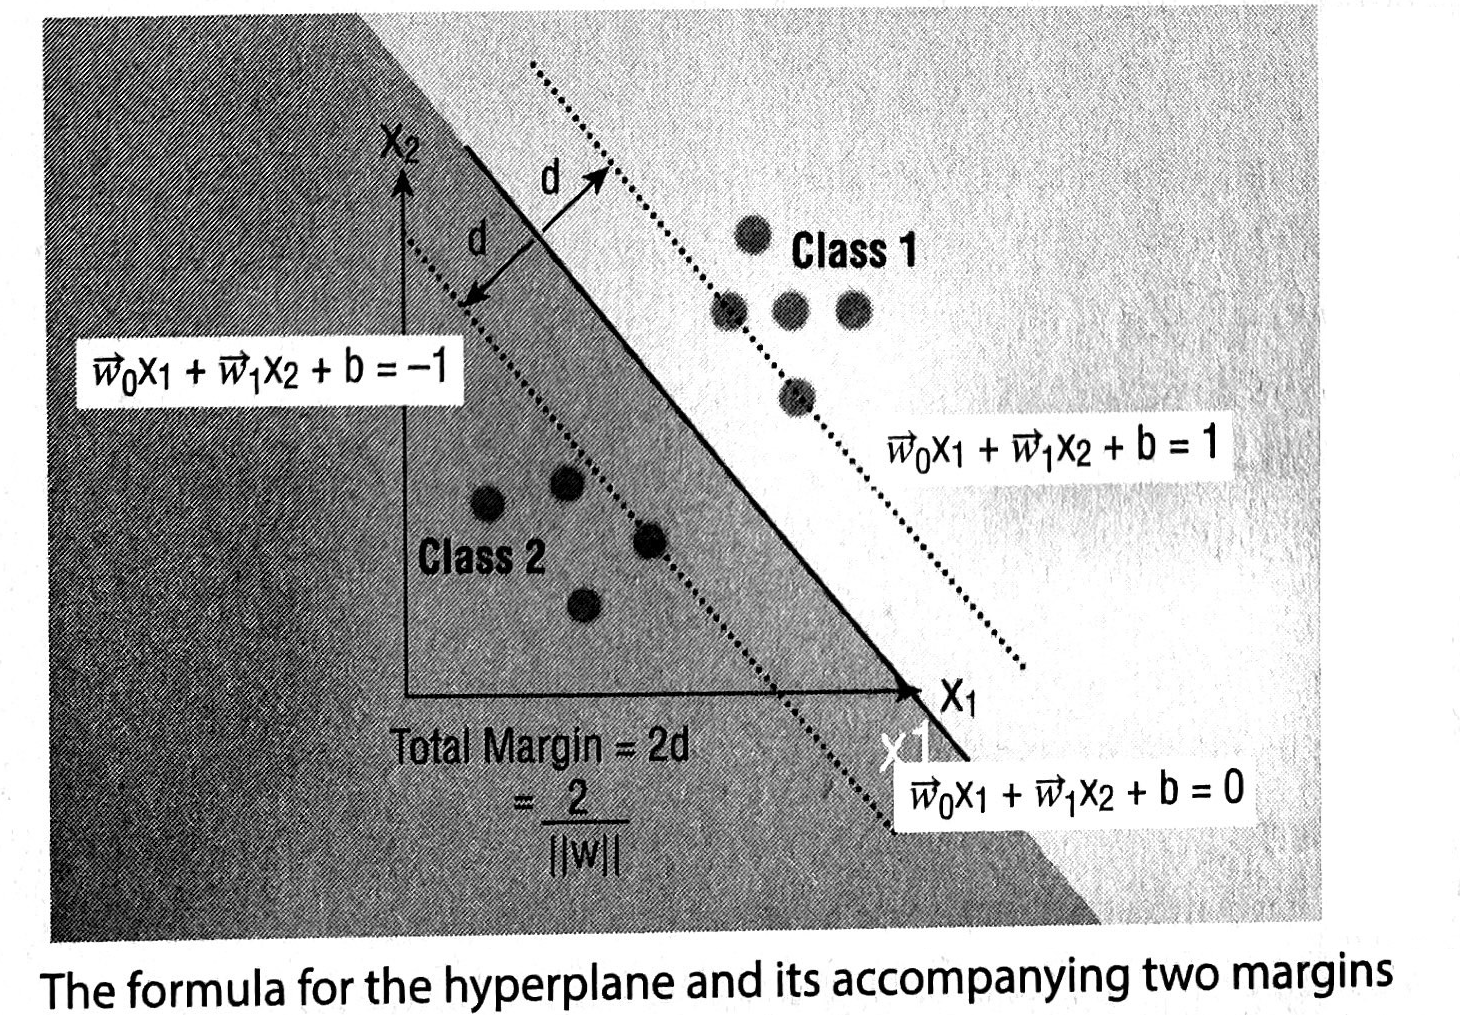

In [21]:
from IPython.display import Image
Image(filename='fig86.png')

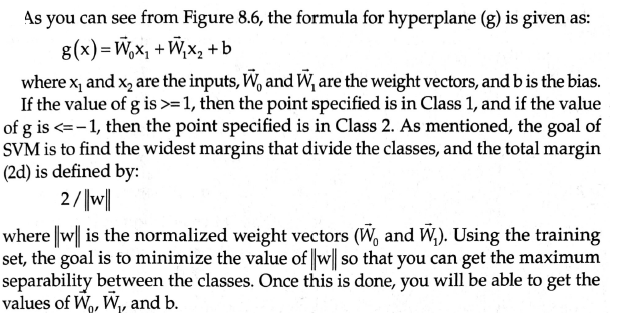

In [25]:
from IPython.display import Image
Image(filename='fig86a.png')

Finding the margin is a <b>Constrained Optimization problem</b>, which can be solved using the <b>Larange Multipliers</b> technique. <br>
It is beyond the scope of this course to discuss how to find the margin based on the dataset, but suffice it to say that <b> we will make use of the Scikit—learn library to find them.</b>

## Using Scikit—learn for SVM

Now let’s work on an <b>example</b> to see how SVM works and how to implement it <b>using Scikit—learn.</b><br>
For this example, we have a file named <b>svm.csv</b> containing the following data:
xl,x2,r<br>
0,0,A<br>
1,1,A<br>
2,3,B<br>
2,0,A<br>
3,4,B<br>
The first thing that we will do is to plot the points using Seaborn:

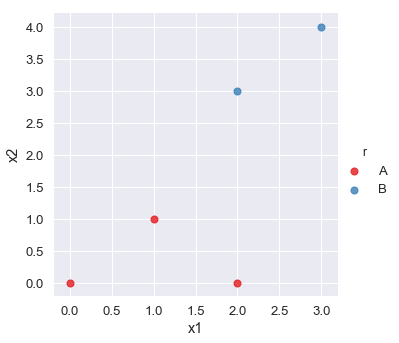

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('svm.csv')
sns.lmplot('x1', 'x2',
           data=data,
           hue='r',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});


Using the data points that we have previously loaded, now let’s use <b>Scikit-learn’s svm module’s svc class</b> to help us derive the value for the various variables that we need to compute otherwise. The following code snippet uses the <b>linear kernel</b> to solve the problem. The linear kernel assumes that the dataset can be separated linearly.<br>
<br>
The svc stands for <b><i>Support Vector Classification.</i></b> The svm module contains a
series of classes that implement SVM for different purposes:<br>

- svm.Linearsvc: Linear Support Vector Classification<br>
- svm.LinearSVR: Linear Support Vector Regression<br>
- svm.NuSVC. Nu-Support Vector Classification<br>
- svm.NuSVR: Nu-Support Vector Regression<br>
- svm.0neC1assSVM: Unsupervised Outlier Detection<br>
- svm.svc: C-Support Vector Classification<br>
- svm. SVR.’ Epsilon-Support Vector Regression<br><br>

For this section, our <b>focus is on using SVM for classification</b>, even though SVM can also be used for regression.<br>

The preceding code snippet yields the following output:


In [12]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['x1','x2']].values
result = data['r']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))


Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


As you can see, the vector of weights has been found to be <b>[0.4 0.8]</b>, meaning that <b>W0 is now 0.4 and W1 is now 0.8.</b><br>
The value of <b>b is —2.2, and there are two support vectors</b>.<br>
The index of the support vectors is 1 and 2, meaning that the points are the ones in bold:<br>
x1 x2 r      <br>
0  0  0     A<br>
1  1  1  <b>A</b><br>
2  2  3  <b>B</b><br>
3  2  0     A<br>
4  3  4     B<br>

Figure below shows the <b>relationship between the various variables in the formula and the variables</b> in the code snippet.

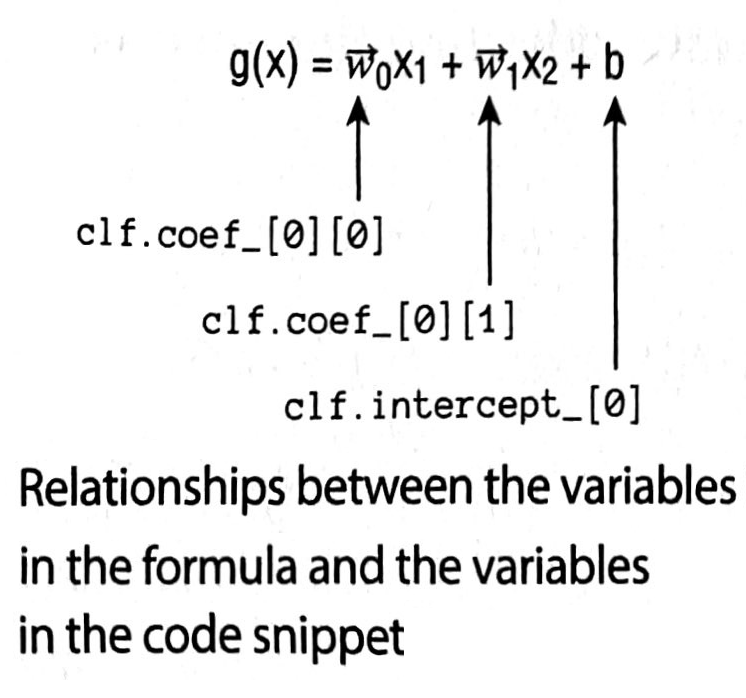

In [27]:
from IPython.display import Image
Image(filename='fig88.png')

## Plotting the Hyperplane and the Margins

With the values of the variables all obtained, it is now time to plot the hyperplane and its two accompanying margins. Do you remember the formula for
the hyperplane? It is as follows:

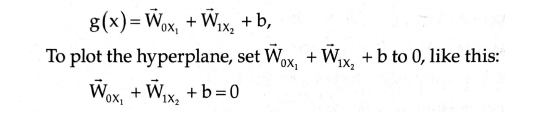

In [28]:
from IPython.display import Image
Image(filename='fig88a.png')

In order to plot the hyperplane (which is a straight line in this case), we need
two points: one on the x—axis and one on the y—axis.
Using the preceding formula, when x1 = O, we can solve for x2 as follows:

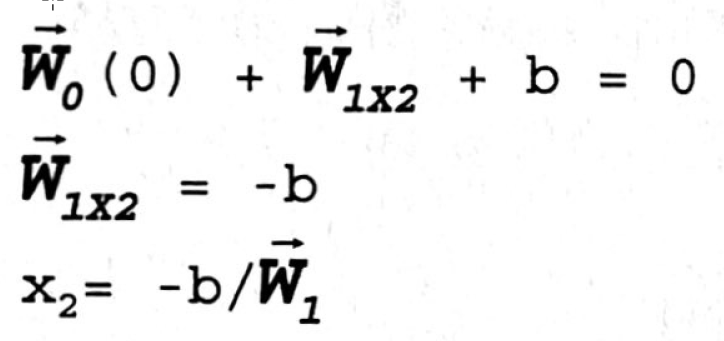

In [29]:
from IPython.display import Image
Image(filename='fig88b.png')

When x2 = 0, we can solve for x1 as follows:

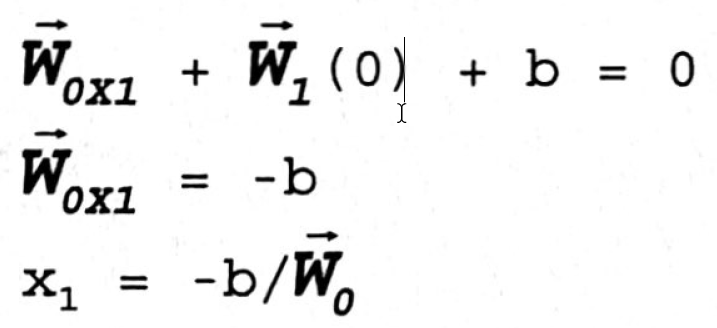

In [30]:
from IPython.display import Image
Image(filename='fig88c.png')

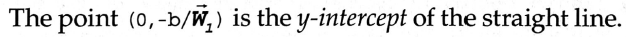

In [31]:
from IPython.display import Image
Image(filename='fig88d.png')

Figure below shows the two points on the two axes.

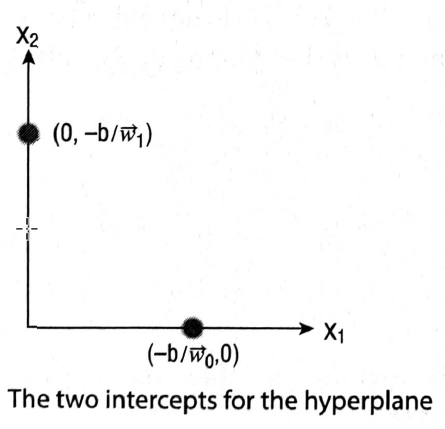

In [33]:
from IPython.display import Image
Image(filename='fig89.png')

Once the points on each axis are found, you can now calculate the slope as
follows:

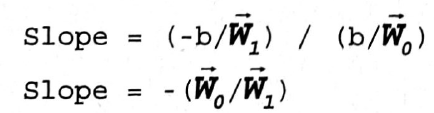

In [34]:
from IPython.display import Image
Image(filename='fig90.png')

With the<b> slope and y—intercept</b> of the line found, you can now go ahead and <b>plot the hyperplane.</b> The following code snippet does just that:

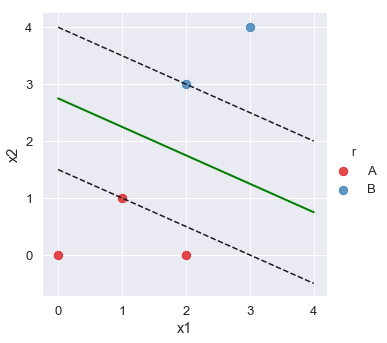

In [35]:
#---w is the vector of weights---
w = clf.coef_[0]

#---find the slope of the hyperplane---
slope = -w[0] / w[1]

b = clf.intercept_[0]

#---find the coordinates for the hyperplane---
xx = np.linspace(0, 4)
yy = slope * xx - (b / w[1])

#---plot the margins---
s = clf.support_vectors_[0]    #---first support vector---
yy_down = slope * xx + (s[1] - slope * s[0])

s = clf.support_vectors_[-1]   #---last support vector---
yy_up   = slope * xx + (s[1] - slope * s[0])

#---plot the points---
sns.lmplot('x1', 'x2', data=data, hue='r', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');

#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


## Making Predictions

Remember, the <b>goal of SVM is to separate the points into two or more classes, so that you can use it to predict the classes of future points.</b><br> Having trained your model using SVM, you can now perform some predictions using the model.<br>
The following code snippet uses the model that you have trained to perform
some predictions:

In [36]:
print(clf.predict([[3,3]])[0])  # 'B'
print(clf.predict([[4,0]])[0])  # 'A'
print(clf.predict([[2,2]])[0])  # 'B'
print(clf.predict([[1,2]])[0])  # 'A'


B
A
B
A


Check the points against the chart shown previously and see if it makes
sense to you.

# Kernel Trick

In [ ]:
Sometimes, the points in a dataset are not always linearly separable. Consider
the points shown

## Adding a Third Dimension

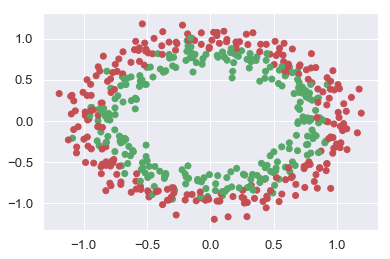

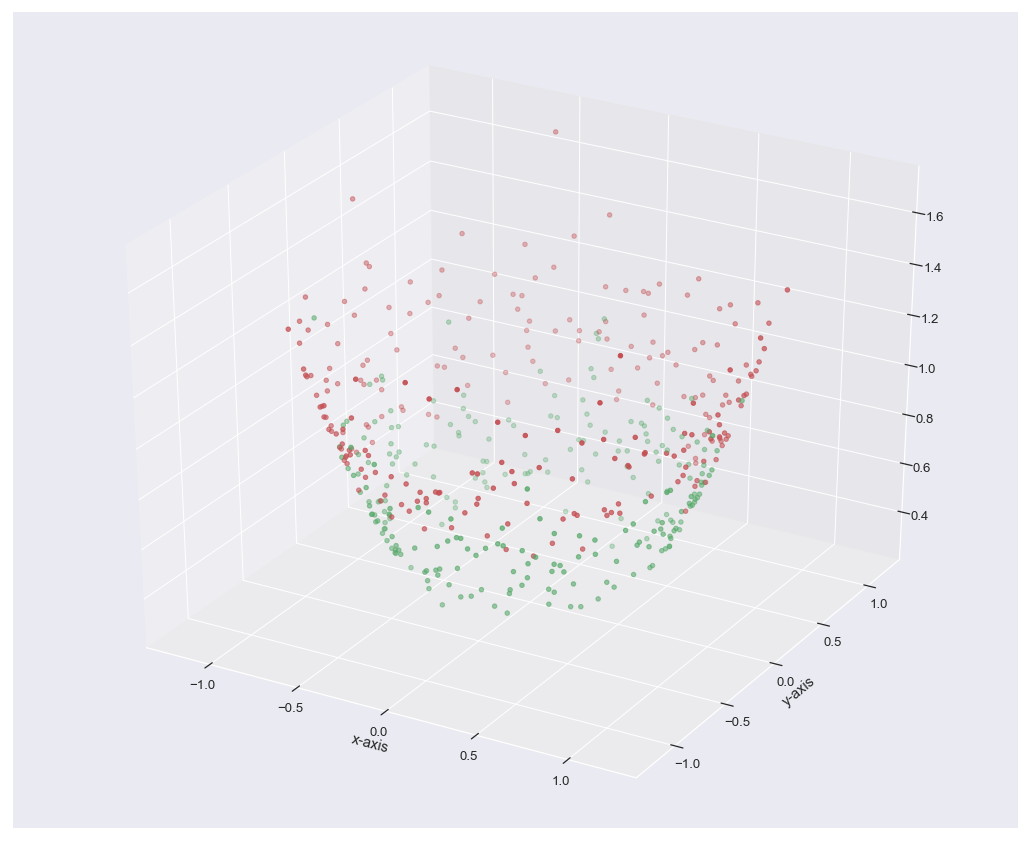

In [5]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)

rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


## Plotting the 3D Hyperplane

In [6]:
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)

#---use SVM for training---
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

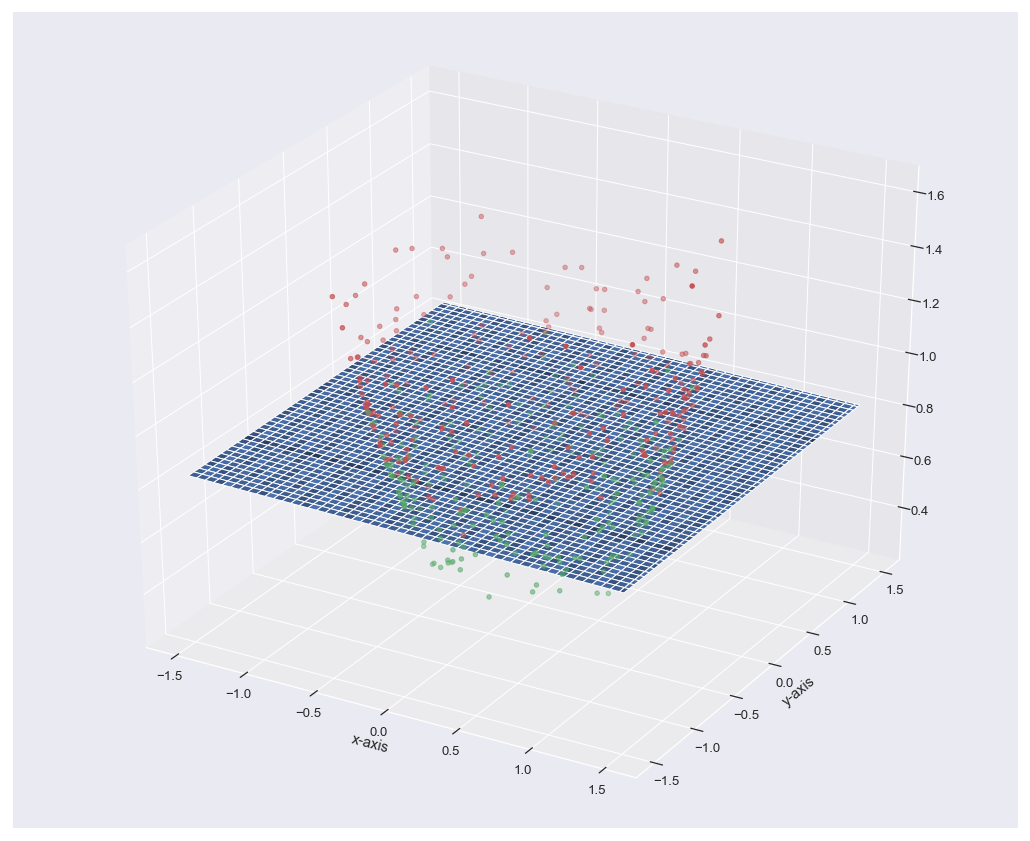

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:,0]**2 + X[:,1]**2

rgb = np.array(['r', 'g'])

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
# plt.show()

#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)

#---use SVM for training---
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) / \
                   clf.coef_[0][2]

tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x, y, x3(x,y))
plt.show()


# Types of Kernels

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris.data[0:5])      # print first 5 rows
print(iris.feature_names)  # ['sepal length (cm)', 'sepal width (cm)',
                           #  'petal length (cm)', 'petal width (cm)']
print(iris.target[0:5])    # print first 5 rows
print(iris.target_names)   # ['setosa' 'versicolor' 'virginica']


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [9]:
X = iris.data[:, :2]       #  take the first two features
y = iris.target


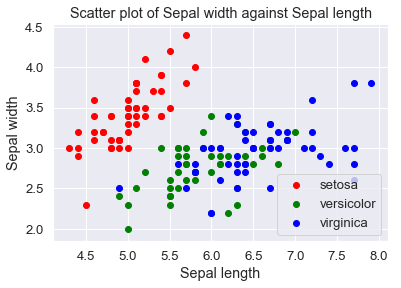

In [10]:
#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()


In [11]:
C = 1  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C).fit(X, y)
title = 'SVC with linear kernel'


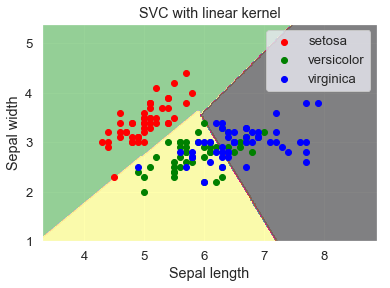

In [12]:
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)


## C

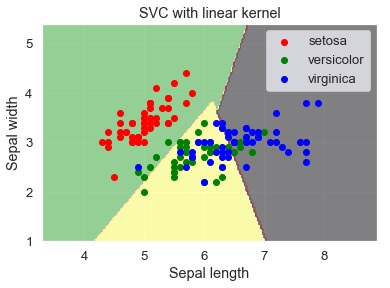

In [13]:
C = 10**-10  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C).fit(X, y)
title = 'SVC with linear kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

## Radial Basis Function (RBF) Kernel

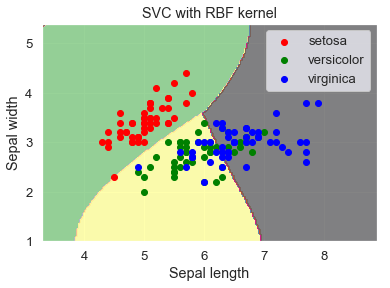

In [14]:
C = 1
clf = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)
title = 'SVC with RBF kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

## Gamma

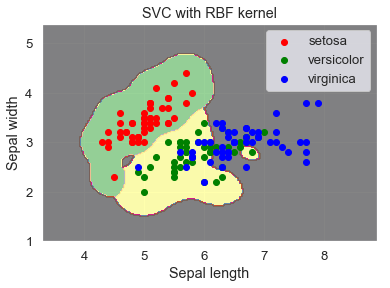

In [15]:
C = 1
clf = svm.SVC(kernel='rbf', gamma=10, C=C).fit(X, y)
title = 'SVC with RBF kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

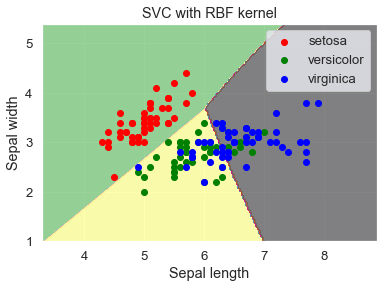

In [16]:
C = 1
clf = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X, y)
title = 'SVC with RBF kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)


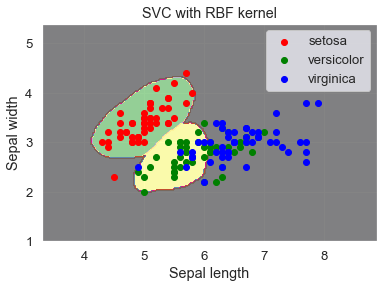

In [17]:
C = 10**-10
clf = svm.SVC(kernel='rbf', gamma=10, C=C).fit(X, y)
title = 'SVC with RBF kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)


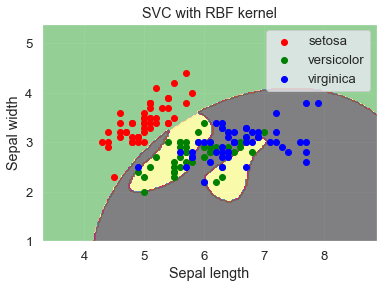

In [18]:
C = 10**10
clf = svm.SVC(kernel='rbf', gamma=0.10, C=C).fit(X, y)
title = 'SVC with RBF kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)


## Polynomial Kernel

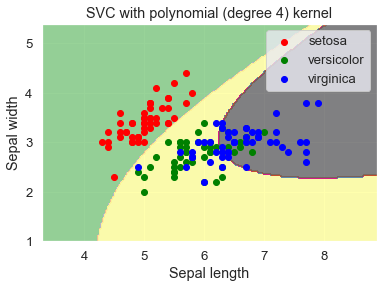

In [19]:
C = 1  # SVM regularization parameter
clf = svm.SVC(kernel='poly', degree=4, C=C, gamma='auto').fit(X, y)
title = 'SVC with polynomial (degree 4) kernel'

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)


# Using SVM for Real-Life Problems

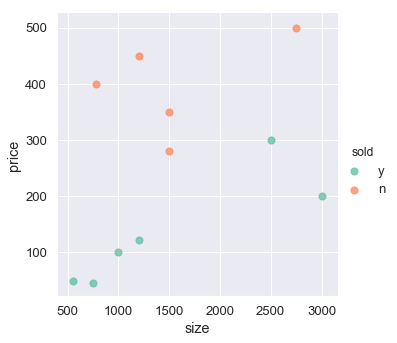

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

data = pd.read_csv('house_sizes_prices_svm.csv')

sns.lmplot('size', 'price',
           data=data,
           hue='sold',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});


In [21]:
X = data[['size','price']].values
y = np.where(data['sold']=='y', 1, 0) #--1 for Y and 0 for N---
model = svm.SVC(kernel='linear').fit(X, y)


Text(0.5,1,'Size of Houses and Their Asking Prices')

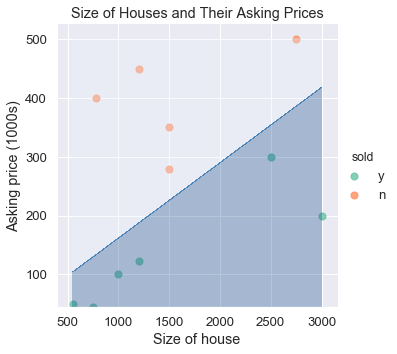

In [22]:
sns.lmplot('size', 'price',
           data=data,
           hue='sold',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min) / 20

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Size of house')
plt.ylabel('Asking price (1000s)')
plt.title("Size of Houses and Their Asking Prices")


In [23]:
def will_it_sell(size, price):
    if(model.predict([[size, price]]))==0:
        print('Will not sell!')
    else:
        print('Will sell!')

#---do some prediction---
will_it_sell(2500, 400)  # Will not sell!
will_it_sell(2500, 200)  # Will sell!


Will not sell!
Will sell!
